In [3]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [26]:
kelp = pd.read_csv("Kelp Trader Log CSV.csv", sep=",")
d1 = pd.read_csv("d1csv.csv", sep=",")

In [27]:
d1 = d1[d1['symbol'] == 'KELP']
d1 = d1[d1['Dist from VWAP'] < 1]
d1 = d1[d1['Dist from VWAP'] > -1]

In [28]:
kelplog_inf_buyer = kelp[kelp['buyer'] == "InferredBot"]
vwap_inf_buyer = d1[d1['buyer'] == "InferredBot"]
vwap_inf_buyer = vwap_inf_buyer.drop(columns=['symbol', 'seller'])
kelplog_inf_buyer = kelplog_inf_buyer.drop(columns=['symbol', 'seller'])


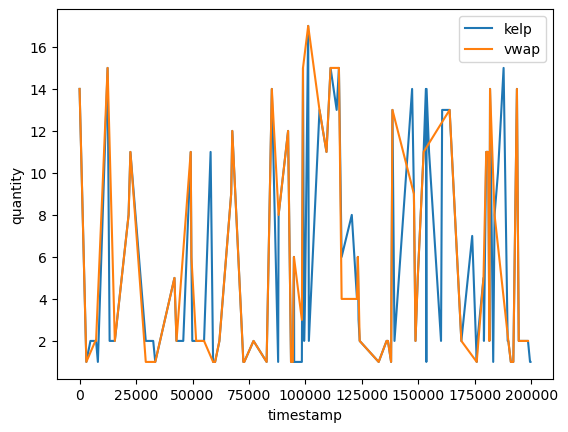

In [29]:
import seaborn as sns

sns.lineplot(data=kelplog_inf_buyer, x="timestamp", y="quantity", label="kelp")
sns.lineplot(data=vwap_inf_buyer, x="timestamp", y="quantity", label="vwap")
plt.show()

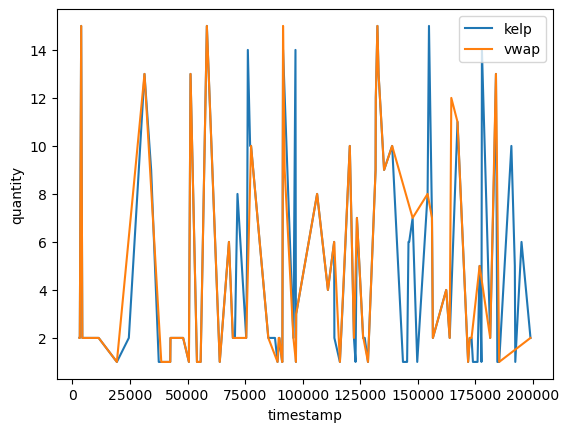

In [30]:
kelplog_inf_seller = kelp[kelp['seller'] == "InferredBot"]
vwap_inf_seller = d1[d1['seller'] == "InferredBot"]
vwap_inf_seller = vwap_inf_seller.drop(columns=['symbol', 'buyer'])
kelplog_inf_seller = kelplog_inf_seller.drop(columns=['symbol', 'buyer'])
sns.lineplot(data=kelplog_inf_seller, x="timestamp", y="quantity", label="kelp")
sns.lineplot(data=vwap_inf_seller, x="timestamp", y="quantity", label="vwap")
plt.show()

In [31]:
vwap_inf_seller.sort_values(by='quantity', ascending=False)

,timestamp,price,quantity,seller,Dist from VWAP
478,132500,2014,15,InferredBot,0.538462
11,3800,2024,15,InferredBot,0.500000
324,91500,2016,15,InferredBot,0.500000
201,58400,2017,15,InferredBot,0.510638
649,184000,2020,13,InferredBot,0.500000
...,...,...,...,...,...
320,91100,2016,1,InferredBot,0.500000
461,128400,2014,1,InferredBot,0.553571
322,91200,2016,1,InferredBot,0.500000
344,97100,2019,1,InferredBot,0.540984


In [32]:
kelplog_inf_seller.sort_values(by='quantity', ascending=False)

,timestamp,price,quantity,seller,Dist from VWAP
17,3800,2024,15,InferredBot,0.500000
709,154900,2016,15,InferredBot,1.000000
265,58400,2017,15,InferredBot,0.510638
612,132500,2014,15,InferredBot,0.538462
343,76200,2015,14,InferredBot,1.000000
...,...,...,...,...,...
417,91200,2016,1,InferredBot,0.500000
447,97100,2019,1,InferredBot,0.540984
592,128400,2014,1,InferredBot,0.553571
531,116200,2019,1,InferredBot,0.526316


In [ ]:
merged_seller = kelplog_inf_seller.merge(vwap_inf_seller, on='timestamp', how='outer')
merged_seller.loc[:,['quantity_y', 'quantity_x']] = merged_seller.loc[:,['quantity_y', 'quantity_x']].fillna(0)
diff = (merged_seller['quantity_y']-merged_seller['quantity_x']).sum()
print('True Bot Sell Quantity - Liquidity Model Sell Quantity: ', diff)

Liquidity Model Sell Quantity - True Bot Sell Quantity:  -133.0


In [35]:
merged_seller[merged_seller['quantity_y'] > merged_seller['quantity_x']].sort_values(by='quantity_y', ascending=False).head(10)

,timestamp,price_x,quantity_x,seller_x,Dist from VWAP_x,price_y,quantity_y,seller_y,Dist from VWAP_y
38,91500,2016.0,14.0,InferredBot,0.5,2016.0,15.0,InferredBot,0.500000
77,164600,NaN,0.0,NaN,NaN,2017.0,12.0,InferredBot,0.958333
39,92200,NaN,0.0,NaN,NaN,2016.0,9.0,InferredBot,0.500000
34,89600,NaN,0.0,NaN,NaN,2015.0,2.0,InferredBot,0.982143


In [36]:
kelplog_inf_seller

,timestamp,price,quantity,seller,Dist from VWAP
14,3100,2024,2,InferredBot,0.543860
15,3200,2024,2,InferredBot,0.530612
17,3800,2024,15,InferredBot,0.500000
20,4300,2024,2,InferredBot,0.267857
54,11400,2023,2,InferredBot,0.500000
...,...,...,...,...,...
861,190700,2021,10,InferredBot,1.000000
871,192200,2020,5,InferredBot,1.000000
872,192400,2020,1,InferredBot,1.000000
884,195100,2018,6,InferredBot,1.103448
